In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import contextily as ctx

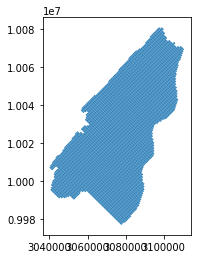

In [2]:
gdf = gpd.read_file(os.path.join("..", "data", "Zones_GAM_BartonSprings", "BSGAMKZones.shp"))
gdf.plot()

In [4]:
# gdf2.to_file(os.path.join("..", "data", "Zones_GAM_BartonSprings", "BS_Zones_Dissolve.shp"))
# gdf3 = gdf2[gdf2['geometry'].type == 'MultiPolygon']

# from shapely.geometry import MultiPolygon, Polygon
# polygons = list(gdf3.geometry)

# polys = []
# for polygon in gdf3.geometry:  # same for multipolygon.geoms
#     polys.append(polygon)

In [5]:
gdf2 = gdf.dissolve(by="Kzone")

gdf_fin = gdf2.explode()
gdf_fin = gdf_fin.droplevel(1)
gdf_fin.reset_index(inplace=True)
gdf_fin.drop_duplicates(subset=["Kzone", "OBJECTID"], inplace=True)
gdf_fin.to_file(os.path.join("..", "data", "Zones_GAM_BartonSprings", "BS_Zones_Dissolve.geojson"), driver='GeoJSON')

In [6]:
# gdf4 = gpd.GeoDataFrame(max(gdf3['geometry'], key=lambda a: a.area))
# gdf4.rename(columns={0: "geometry"}, inplace=True)
# gdf4.to_file(os.path.join("..", "data", "Zones_GAM_BartonSprings", "BS_Zones_Dissolve.geojson"), driver='GeoJSON')

In [7]:
gdf5 = gdf2[gdf2['geometry'].type == 'Polygon']
gdf5.head(2)

,geometry,OBJECTID,HydroID,HydroCode,Row,Col,ModelCode,LandElev,Active,Shape_Leng,...,RowCol,CellID,Layer,Row_1,Col_1,Active_1,LUZoneID,LandElev_1,BotElev,RowCol_1
Kzone,,,,,,,,,,,,,,,,,,,,,
1.0,"POLYGON ((3054133.533830449 10010010.7242901, ...",410,310143,None,35,16,None,899,1,0.008893,...,3516,4096.0,1.0,35,16,1.0,1.0,898.72,850.02,3516
2.0,"POLYGON ((3069279.866398603 10023163.57462476,...",129,309005,None,9,60,None,911,1,0.008895,...,960,1020.0,1.0,9,60,1.0,1.0,910.75,739.65,960


In [ ]:
gdf5.to_file(os.path.join("..", "data", "Zones_GAM_BartonSprings", "BS_Zones_Dissolve.geojson"), driver='GeoJSON')

In [8]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    return ax

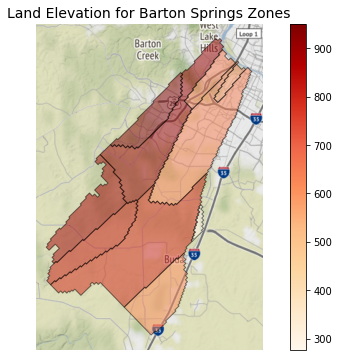

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,6))
gdf5 = gdf5.to_crs(epsg=3857)

gdf5.plot(column='LandElev', ax=ax, legend=True, cmap='OrRd', alpha=0.5, edgecolor='k', label=True,
          legend_kwds={'label': "Population by Country",'orientation': "horizontal"})
add_basemap(ax, zoom=11)
ax.set_title("Land Elevation for Barton Springs Zones", size=14)
ax.set_axis_off()
plt.savefig("BS_Map.png")